# Exercise 2

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


pd.set_option('display.float_format', lambda x: '%.5f' % x)

First, we load our data and have a look at it.

In [32]:
df = pd.read_csv("../data/Youtube_Statistics_full.csv", encoding_errors = 'replace', encoding = 'utf-8', delimiter=';', low_memory=False)
df.sample(10)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Country
59183,xX1w5qaJ6l8,18.26.02,Das magnetische Wasser (Teil 2) | Verstehen Si...,Verstehen Sie Spaß?,24.00000,24.02.2018 12:00,"verstehen sie spaß|""verstehen sie spass""|""vers...",64041.00000,2483.00000,168.00000,318.00000,https://i.ytimg.com/vi/xX1w5qaJ6l8/default.jpg,FALSCH,FALSCH,FALSCH,Den Passanten in einer Einkaufspassage wird ei...,Germany
135603,oI42BohDabU,18.16.02,Katy Perry Watches Fan Covers On YouTube | Gla...,Glamour Magazine,24.00000,06.02.2018 14:01,"you sang my song|""watching fan covers""|""fan co...",2955298.00000,88763.00000,1767.00000,3385.00000,https://i.ytimg.com/vi/oI42BohDabU/default.jpg,FALSCH,FALSCH,FALSCH,"On this episode of You Sang My Song, Katy Perr...",Great Britain
86285,CA6iiiLk_uQ,172012,Top 6 des femmes scientifiques qui se sont fai...,Topito,24.00000,18.12.2017 17:00,"Topito""|""Top""|""Liste""|""science""|""femme""|""décou...",288894.00000,20250.00000,676.00000,1464.00000,https://i.ytimg.com/vi/CA6iiiLk_uQ/default.jpg,FALSCH,FALSCH,FALSCH,"Parce qu'à part Marie Curie, il faut bien reco...",France
749,tl_1Fgs2fy8,171711,Budweiser | One Last Ride,Budweiser,24.00000,14.11.2017 14:26,"nascar|""budweiser""|""dale earnhardt jr""|""junior...",317426.00000,2784.00000,25.00000,218.00000,https://i.ytimg.com/vi/tl_1Fgs2fy8/default.jpg,FALSCH,FALSCH,FALSCH,Dale Jr. drove the Bud car for eight years. To...,Canada
77271,ehnh_1eghMo,18.05.2006,10 BESTEN TRAVEL-HACKS | mit meiner Mom,Faye Montana,24.00000,04.06.2018 18:00,"Hacks|""Travel""|""Travelhacks""|""Urlaub""|""Reise""|...",38743.00000,3286.00000,70.00000,363.00000,https://i.ytimg.com/vi/ehnh_1eghMo/default.jpg,FALSCH,FALSCH,FALSCH,Ladet euch die Urlaubsgruss-App runter und sch...,Germany
20972,2bxw_1Un9S4,180603,Jimmy Kimmel's Oscars 2018 Opening Monologue,ABC Television Network,24.00000,05.03.2018 02:54,"oscars|""academy""|""awards""|""statue""|""ceremony""|...",1051114.00000,5800.00000,1878.00000,1553.00000,https://i.ytimg.com/vi/2bxw_1Un9S4/default.jpg,FALSCH,FALSCH,FALSCH,Watch Jimmy Kimmel's opening monologue from th...,Canada
47427,SG5al5UTolU,17.26.12,"Christmas chaos: WWE Top 10, Dec. 25, 2017",WWE,17.00000,25.12.2017 16:00,"wwe|""world wrestling entertainment""|""wrestling...",1367546.00000,30023.00000,866.00000,1445.00000,https://i.ytimg.com/vi/SG5al5UTolU/default.jpg,FALSCH,FALSCH,FALSCH,The holiday season is the most wonderful time ...,Germany
44614,#NAME?,17.12.2012,das eis war nicht stark genug...,iCrimax,24.00000,11.12.2017 15:30,"funny|""kid friendly""|""family friendly""|""funny ...",90289.00000,6540.00000,442.00000,581.00000,https://i.ytimg.com/vi/-mCPxSHIrPc/default.jpg,FALSCH,FALSCH,FALSCH,Wir reagier aufe Icefail Compilations\n►Meine ...,Germany
133084,Geg4yDxZZDs,18.31.01,En Vogue - Rocket,EnVogueVEVO,10.00000,22.01.2018 17:20,"En|""Vogue""|""Rocket""|""Records""|""R&B/Soul""|""Soul""",364668.00000,15121.00000,721.00000,2371.00000,https://i.ytimg.com/vi/Geg4yDxZZDs/default.jpg,FALSCH,FALSCH,FALSCH,En Vogue Rocket \nGet the new En Vogue single ...,Great Britain
62256,T2rlnGk19hQ,18.14.03,Ostertorte / Sahnetorte / Torte,Silvia W-K,22.00000,11.03.2018 13:02,"Tipps|""Tricks""|""Backen""|""Kochen""|""Garten""|""Hau...",41802.00000,1504.00000,64.00000,146.00000,https://i.ytimg.com/vi/T2rlnGk19hQ/default.jpg,FALSCH,FALSCH,FALSCH,"Feine Ostertorte aus einem Schoko-Nussbiskuit,...",Germany


In [33]:
# fill empty country values in col "COUNTRY"
df["Country"].fillna("No Country", inplace=True)

## a) Tabulation per country

In [34]:
# craete new dataframe with count and share
df_country_tabulation = pd.DataFrame(
    {
        "count": df["Country"].value_counts(),
        "share": df["Country"].value_counts(normalize=True),
    }
)

df_country_tabulation

,count,share
France,40213,0.17781
Mexico,40099,0.17730
Germany,40014,0.17693
Canada,39086,0.17282
USA,36761,0.16254
Great Britain,29980,0.13256
No Country,10,0.00004


## b) Analysis of variable views

First, we load the views into a pandas series and clean missing values.

In [35]:
df_views = pd.Series(df["views"])

# check for NaN
df_views.isna().sum()

10

In [36]:
# drop NaN values
df_views.dropna(inplace=True)
df_views.isnull().sum()

0

After clearing the data, we wanted to have a look at the data:

In [37]:
# have a look at the data
df_views.describe()

count    226153.00000
mean     556551.02900
std      836232.17738
min         157.00000
25%       46019.00000
50%      199221.00000
75%      672071.00000
max     4994034.00000
Name: views, dtype: float64

### Here we measure **location** statistics:

In [38]:
# sort values for the trimmed mean calculation
df_views_sorted = df_views.sort_values(ascending=True)
trimmed_mean = stats.trim_mean(df_views_sorted, 0.2)

# mean = most occuring value
views_mode = df_views.mode()
# median = splits data in half -> 50% over and under median
views_median = df_views.median()
# mean = arithmetic average value
views_mean = df_views.mean()

print(f"Trimmed mean with 20% cuttoff of youtube views is: {trimmed_mean}\nMedian: {views_median}\nMean: {views_mean}\nModes: \n{views_mode}")

Trimmed mean with 20% cuttoff of youtube views is: 273909.66089628794
Median: 199221.0
Mean: 556551.0289980677
Modes: 
0   3778.00000
1   6573.00000
Name: views, dtype: float64


To put the calculated values into perspective, we chose to draw a histogram to show the distribution with their mean and median values.

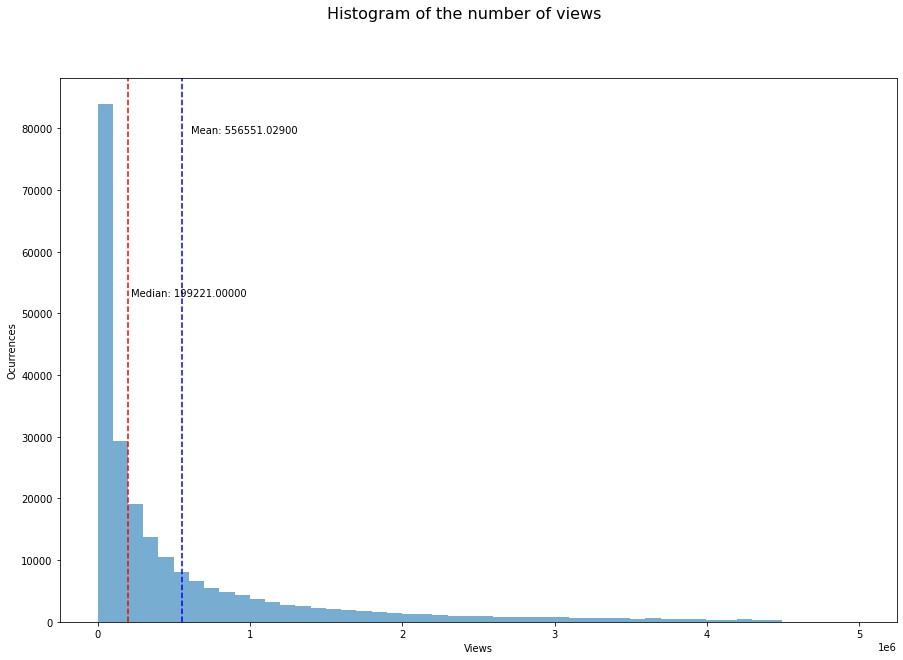

In [39]:
# show graphical representations of the distribution
fig, ax = plt.subplots(1)
fig.set_size_inches(15,10)
fig.suptitle("Histogram of the number of views", fontsize=16)

n, bins, patches = ax.hist(df_views, bins = 50, alpha = 0.6)
ax.set_ylabel("Ocurrences")
ax.set_xlabel("Views")

ax.axvline(views_mean, linestyle = "dashed", color = "b")
min_ylim, max_ylim = plt.ylim()
ax.text(views_mean *1.1, max_ylim *0.9, 'Mean: {:.5f}'.format(views_mean))
ax.axvline(views_median, linestyle = "dashed", color = "r")
#min_ylim_2, max_ylim_2 = plt.ylim()
ax.text(views_median *1.1, max_ylim *0.6, 'Median: {:.5f}'.format(views_median))
fig.show()

### Here we measure **spread** statistics:

In [40]:
# variance
variance_views = df_views.var(skipna=True)

# standard deviation
std_deviation_views = np.sqrt(variance_views)

#inter quartile range
quarter =df_views.quantile(0.25)
three_quarter = df_views.quantile(0.75)
iqr = three_quarter - quarter

print(f"Interquartile range for views is: {iqr}\nvariance: {variance_views}\nstandard deviation: {std_deviation_views}")

Interquartile range for views is: 626052.0
variance: 699284254491.5471
standard deviation: 836232.1773834986


### Next, we calculate **skewness** of the distribution:

In [41]:
# skew = "symmetry of the distribution"
skew = (views_mean -views_median) / std_deviation_views

# kurtosis = "heaviness of the distribution tails"
kurtosis = views_mean**4 / std_deviation_views**4

print(f" Skew is: {skew} which indicates our distribution is not normally distributed (confirmed by histogram above) and skewed to the left. \n Kurtosis is : {kurtosis} which means our distribution is platykurtic, therefore we have few outliers and is light-tailed.")

 Skew is: 0.42730959016205744 which indicates our distribution is not normally distributed (confirmed by histogram above) and skewed to the left. 
 Kurtosis is : 0.19620608003227535 which means our distribution is platykurtic, therefore we have few outliers and is light-tailed.


## c) Analysis variable likes

### First we show the *location* statistics for each country:

In [42]:
countries = df["Country"].unique()

# group by category country and only look at column 'likes'
likes = df.groupby(by="Country")["likes"]
trimmed_means_like = pd.Series(data = [0,0,0,0,0,0,0], index = countries) #buffer for trimmed_means

for country in countries:
    buf_df = likes.get_group(country) # get data for each country
    buf_df.sort_values(ascending=True) #sort data of current country
    trimmed_means_like[country] = stats.trim_mean(buf_df, 0.2) #compute trimmed mean for current country

print("here we have trimmed means with 20% cutoff in front and back, for each country")
trimmed_means_like

here we have trimmed means with 20% cutoff in front and back, for each country


Canada          10372.81370
Germany          3978.42799
France           2785.73099
Great Britain   18396.69619
USA             18119.04520
Mexico           2272.12676
No Country              NaN
dtype: float64

For a nice overview of the dataframe and the analysis of it, we can use ``describe()``.

In [43]:
print("here we have mean, median per country: ")
likes.describe()

here we have mean, median per country: 


,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
Canada,39086.00000,23827.31211,44935.97049,0.00000,2054.00000,7830.50000,24416.50000,845029.00000
France,40213.00000,11670.98145,33947.12310,0.00000,331.00000,1830.00000,7487.00000,845046.00000
Germany,40014.00000,13454.35283,33974.13223,0.00000,513.00000,2550.00000,10675.50000,845029.00000
Great Britain,29980.00000,35283.67722,53412.19737,0.00000,4113.00000,13666.50000,43050.00000,889008.00000
Mexico,40099.00000,11296.52246,34530.73652,0.00000,295.00000,1219.00000,6889.00000,845046.00000
No Country,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
USA,36761.00000,33055.17140,49800.50023,0.00000,4633.00000,14796.00000,39126.00000,889008.00000


In [44]:
print("and finally the mode: ")

mode_like = pd.Series(data = [[],[],[],[],[],[],[]], index = countries) #buffer for mode
for country in countries:
    buf_df = likes.get_group(country)
    mode_like[country] = buf_df.mode()
mode_like

and finally the mode: 


Canada           0   0.00000
Name: likes, dtype: float64
Germany          0   0.00000
Name: likes, dtype: float64
France           0   0.00000
Name: likes, dtype: float64
Great Britain    0   0.00000
Name: likes, dtype: float64
USA              0   0.00000
Name: likes, dtype: float64
Mexico           0   0.00000
Name: likes, dtype: float64
No Country       Series([], Name: likes, dtype: float64)
dtype: object

### Next we show *spread* for each country:

In [45]:
print("Variance per country:")
likes_var= likes.var()

likes_var

Variance per country:


Country
Canada          2019241444.19234
France          1152407166.87516
Germany         1154241661.00693
Great Britain   2852862828.04814
Mexico          1192371764.73167
No Country                   NaN
USA             2480089823.08891
Name: likes, dtype: float64

In [46]:
print("Standard deviation per country:")
likes_std = likes.std()
likes_std

Standard deviation per country:


Country
Canada          44935.97049
France          33947.12310
Germany         33974.13223
Great Britain   53412.19737
Mexico          34530.73652
No Country              NaN
USA             49800.50023
Name: likes, dtype: float64

In [47]:
print("interquartile range per country:")

iqr = likes.quantile(0.75)-likes.quantile(0.25)
iqr

interquartile range per country:


Country
Canada          22362.50000
France           7156.00000
Germany         10162.50000
Great Britain   38937.00000
Mexico           6594.00000
No Country              NaN
USA             34493.00000
Name: likes, dtype: float64

### Conclusion
Of all countries **Great Britain** stands out with wider spread like counts. **Great Britain** has the largest *standard deviation* and *Interquartile range*.